In [2]:
# importing stuff..
import numpy as np
import sdeint
import deepdish.io as dd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
%matplotlib inline
import time
from IPython.display import set_matplotlib_formats
from ipywidgets import interact, interactive,FloatSlider,IntSlider,ToggleButton
from ipywidgets import Button, HBox, VBox, Text,Select,Layout,Dropdown
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "sans"
plt.rcParams['font.serif'] = "cm"

In [2]:
data = dd.load('Beninca_B_min_max_to_Tmax.hdf5')
contvar = data['Tmax']

In [2]:
data = dd.load('Beninca_B_min_max_to_alpha.hdf5')
contvar = data['alpha']

In [3]:
data = dd.load('Beninca_V2_means_B_min_max_to_alpha.hdf5')
contvar = data['alpha']

<IPython.core.display.Javascript object>


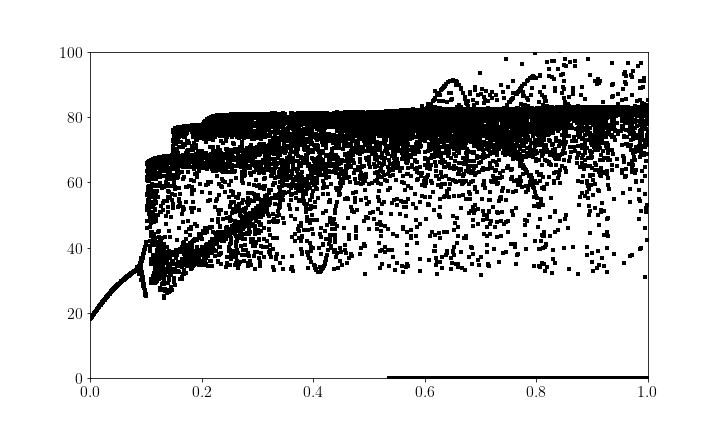

(0.0, 1.0)

In [11]:
# Quick check of bifurcation
%matplotlib notebook
for i,var in enumerate(contvar):
    B = data['B'][i]
    var_arr = var*np.ones_like(B)
    plt.scatter(var_arr,B,s=20,marker=",",c='k', linewidths=0, rasterized=True)
plt.ylim([0,100])
plt.xlim([contvar[0],contvar[-1]])

<IPython.core.display.Javascript object>


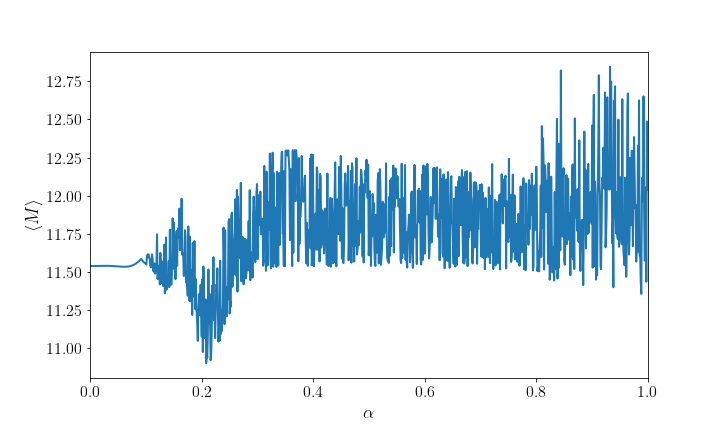

(0, 1)

In [18]:
%matplotlib notebook
plt.plot(data['alpha'],data['M_mean'])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\left< M \right>$')
plt.xlim([0,1])

In [4]:
def check_doubling(sample,guess,threshold_distance):
    guesses = np.array([guess-0.5*threshold_distance,guess+0.5*threshold_distance]).reshape(2,1)
    #print(guesses.shape)
    km = KMeans(init=guesses, n_clusters=2, n_init=1)
    km.fit(sample.reshape(-1,1))
    return (np.fabs(km.cluster_centers_[1]-km.cluster_centers_[0])>threshold_distance)[0],np.squeeze(km.cluster_centers_)
sample = np.random.random(100)
guess = 0.5
threshold = 0.1
split,centers=check_doubling(sample,guess,threshold)
print(np.amin(centers))

0.2412337667731354


In [29]:
bif = {}
limits = [0.0,100.0]
threshold=10.0
guess_B = np.mean(data['B'][0])
line = [guess_B]
bif[0]={"line":line,"limits":limits,"var":[contvar[0]]}
print(len(lines))
max_lines = 4
for i in range(len(lines)):
    print(lines[i])

1
{'line': [18.07639979068642], 'limits': [0.0, 100.0], 'var': [0.0]}


In [30]:
for j,var in enumerate(contvar[1:4]):
    i=j+1
    print("*****")
    print("i=",i,", var=",var)
    previous_len_lines = len(lines)
    extra_lines = 0
    while k<max_lines:
        print("k=",k)
        # Let's say there were two lines, then each one can detect a split, but no more!
        if k>=previous_len_lines:
            break
        # Passing the B's in the range of the specific line
        all_B = data['B'][i]
        limits_k=lines[k]["limits"]
        print("limits[k]",limits_k)
        # Choosing only B in range of limits of the specific line in lines
        B = all_B[np.where((all_B >= limits_k[0]) & (all_B <= limits_k[1]))[0]]
        guess_B = np.mean(B)
        print("B in range:",B)
        print("Guess:",guess_B)
        print("Threshold",threshold)
        split,centers=check_doubling(B,guess_B,threshold)
        if split==True:
            print("Detected a split! At interval:",limits_k,", for guess_B:",guess_B)
            center = np.mean(centers)
            B_bellow=np.where((B <= center) & (B>=limits_k[0]))[0]
            B_above =np.where((B > center) & (B<=limits_k[1]))[0]
            #B_bellow=np.where((B < guess_B) & (B>=limits[k][0]))[0]
            #B_above =np.where((B > guess_B) & (B<=limits[k][1]))[0]
            #print("line:",lines[k]["line"])
            new_k = previous_len_lines+extra_lines
            lines[new_k]={}
            lines[new_k]["line"]=lines[k]["line"].copy()
            limits_above  = [guess_B,limits_k[1]]
            limits_bellow = [limits_k[0],guess_B]
            lines[k]["limits"]=limits_bellow
            lines[new_k]["limits"]=limits_above
            print("Above:",B[B_above],", mean=",np.mean(B[B_above]))
            print("Bellow:",B[B_bellow],", mean=",np.mean(B[B_bellow]))
            lines[k]["line"].append(np.mean(B[B_bellow]))
            lines[new_k]["line"].append(np.mean(B[B_above]))
            #print(lines[k])
            #print(lines[-1])
        else:
            print("Not detected a split...")
            lines[k]["line"].append(np.mean(B))
        #print(np.mean(B))
    print("All lines:",lines)
    print("Guess:",guess_B)
#plt.plot(contvar,lines[0])
#plt.ylim([0,100])
#plt.xlim([contvar[0],contvar[-1]])

*****
i= 1 , var= 0.1111111111111111
k= 0
limits[k] [0.0, 100.0]
B in range: [28.23407557 28.23407557 28.23408569 10.25790309 10.27059203 10.25789398
 10.25789398 10.25789357 28.23129324 28.18981015]
Guess: 19.242551685758364
Threshold 10.0
Detected a split! At interval: [0.0, 100.0] , for guess_B: 19.242551685758364
Above: [28.23407557 28.23407557 28.23408569 28.23129324 28.18981015] , mean= 28.22466804298636
Bellow: [10.25790309 10.27059203 10.25789398 10.25789398 10.25789357] , mean= 10.260435328530361
All lines: {0: {'line': [18.07639979068642, 10.260435328530361], 'limits': [0.0, 19.242551685758364], 'var': [0.0]}, 1: {'line': [18.07639979068642, 28.22466804298636], 'limits': [19.242551685758364, 100.0]}}
Guess: 19.242551685758364
*****
i= 2 , var= 0.2222222222222222
k= 0
limits[k] [0.0, 19.242551685758364]
B in range: [13.53223558 13.52736662 13.52511052 13.5663046  13.53531484  3.87805322
  3.87749862]
Guess: 10.777411998863018
Threshold 10.0
Not detected a split...
k= 1
limits[

/home/ohm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ohm/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.